<a href="https://colab.research.google.com/github/adrianphilo/finance/blob/main/de/equbotic/finance/financeBas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import importlib
import financeBas as fiB
importlib.reload(fiB)

<module 'financeBas' from '/content/financeBas.py'>

---
**DF_ofCash**(cashRate, days, base) >> $DF = \frac 1 { 1 + cashRate * \frac{days} {base} } $  




In [5]:
print ( fiB.DF_ofCash(0.02,  60, 360) )
print ( fiB.DF_ofCash(0.04, 120, 365) )
help(fiB.DF_ofCash)

0.9966777408637874
0.9870200108166577
Help on function DF_ofCash in module financeBas:

DF_ofCash(cashRate, days, base)
    returns the Discountfactor for a CashRate
    :param cashRate: the Cash Interestrate to be converted as a Factor
    :param days: the number of days in the period
    :param base: the DayCountBase of the Rate (e.g. 360 or 365)
    :return: the DiscountFactor at the end of the period



---
**DF_ofZerorate**(zeroRate, days) >> $DF = \frac {1} {e ^ {zeroRate * \frac{days}{365} }} = e ^ {-zeroRate * \frac{days}{365} }$  



In [6]:
print ( fiB.DF_ofZerorate(0.02,  60) )
print ( fiB.DF_ofZerorate(0.04, 120) )
help(fiB.DF_ofZerorate)

0.9967177272404355
0.9869354075207885
Help on function DF_ofZerorate in module financeBas:

DF_ofZerorate(zeroRate, days)
    returns the Discountfactor for a continously compounded ZeroRate
    :param cashRate: the zeroRateto be converted as a Factor
    :param days: the number of days form today
    :return: the DiscountFactor



---
**ZeroRate_ofDF**(df, days) >> $ZeroRate = \frac {-LOGn(df)} { \frac{days} {365} } = \frac {365}{days} * LOGn ( \frac {1}{df} ) $  

In [7]:
print ( fiB.ZeroRate_ofDF(0.996,  60) )
print ( fiB.ZeroRate_ofDF(0.987, 120) )
help(fiB.ZeroRate_ofDF)

0.024382130168361445
0.039800936960493916
Help on function ZeroRate_ofDF in module financeBas:

ZeroRate_ofDF(df, days)
    returns the continously compounded ZeroRate for a DiscountFactor (as Factor on Base 365)
    :param DiscountFactor: to be converted
    :param days: the number of days in the period
    :return: the ZeroRate for the period (Base is 365)



---
**PV_ofCoupon(0.03, 5)** >> $ PresentValue (FaceVal:1) = \sum {\frac {cpn}{(1+cpn)^{yr}}} + \frac {1}{(1+cpn)^{years}} $



In [8]:
print ( fiB.PV_ofCoupon(0.03, 5) )
print ( fiB.PV_ofCoupon(0.04, 10) )
help  ( fiB.PV_ofCoupon )

0.9661218385102635
0.9187672696030861
Help on function PV_ofCoupon in module financeBas:

PV_ofCoupon(cpn, years)
    calcs the PresentValue of a fixed Coupon Cashflow (yearly)
    :param cpn: the coupon as factor
    :param years: Maturity in Years
    :return: the present value of face value 1



---
**addRateToCurve** : adds a rate or forward rate to the curve 

In [9]:
help ( fiB.addRateToCurve )

Help on function addRateToCurve in module financeBas:

addRateToCurve(dates, dfs, zeros, cashRate, days, base, fwdstart)
    adds a rate or forward rate to the curve (lists of dates, dfs, zeros)
    :param dates: list of the Dates in the Curve (Buckets)
    :param dfs:   list of the DiscountFactor at each Date
    :param zeros: list of Zero Rate at each Date
    :param days:  days of period
    :param base:  the DayCountBase of the Rate (e.g. 360 or 365)
    :param fwdstart: start date of period



---
**addParCpnToCurve** : adds a ParCoupon Rate (SwapRate) ro the curve

In [10]:
help ( fiB.addParCpnToCurve )

Help on function addParCpnToCurve in module financeBas:

addParCpnToCurve(dates, dfs, zeros, cpn, years, mtrdays, lastcpndays)
    adds a ParCoupon Rate (SwapRate) ro the curve. 
    only yearly and the last cpn date must be known and in the curve.
    swap starts at spot date.
    :param dates: list of the Dates in the Curve (Buckets)
    :param dfs:   list of the DiscountFactor at each Date
    :param zeros: list of Zero Rate at each Date
    :param cpn:   par coupon of the Bond or Swap Rate
    :param years: number of Years 
    :param mtrdays: date of the maturity
    :param lastcpndays: ist the days from today to coupondate before matirity



---
**Build a Curve**

In [11]:
CurveDates = list()
CurveDFs   = list()
CurveZeros = list()

fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros, -0.06643,   1, 360,    0)   # O/N
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros, -0.06,      1, 360,    1)   # T/N
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros, -0.019,     7, 360,    2)   # 1W
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.008,    31, 360,    2)   # 1M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.031,    62, 360,    2)   # 2M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.06,     92, 360,    2)   # 3M

fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.024,    92, 360,   94)   #  3M- 6M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0242,   90, 360,  186)   #  6M- 9M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0246,   91, 360,  276)   #  9M-12M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0251,   92, 360,  367)   # 12M-15M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0302,   92, 360,  459)   # 15M-18M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0381,   91, 360,  551)   # 18M-21M
fiB.addRateToCurve  (CurveDates, CurveDFs, CurveZeros,  0.0466,   92, 360,  642)   # 21M-24M

fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0141,  3, 1096,  734)   #  3yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0198,  4, 1461, 1096)   #  4yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0276,  5, 1826, 1461)   #  5yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0378,  6, 2192, 1826)   #  6yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0498,  7, 2557, 2192)   #  7yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0625,  8, 2922, 2557)   #  8yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0755,  9, 3287, 2922)   #  9yr swap
fiB.addParCpnToCurve(CurveDates, CurveDFs, CurveZeros,  0.0898, 10, 3653, 3287)   # 10yr swap 

print(CurveDates)
print(CurveDFs)
CurveZeros

[1, 2, 9, 33, 64, 94, 186, 276, 367, 459, 551, 642, 734, 1096, 1461, 1826, 2192, 2557, 2922, 3287, 3653]
[1.000184561834563, 1.0003512870490712, 1.0007209978621703, 0.9996626305702339, 0.9950388850019222, 0.9852442091750536, 0.9792382147910021, 0.9733494506147826, 0.9673342438418261, 0.9611688794627832, 0.9538076043298112, 0.944709266832492, 0.9335912325761023, 0.9206106227946971, 0.9027364412577927, 0.8784901141084008, 0.8464926904108699, 0.8063371026965802, 0.7589055084203108, 0.7056304122922463, 0.6474861555260105]


[-0.06735885386988928,
 -0.06409862860548254,
 -0.029229932760945196,
 0.003732139949901499,
 0.028364276513684634,
 0.05772335384641555,
 0.041171100142525785,
 0.03572254163437393,
 0.03303020552283913,
 0.03149429330226363,
 0.03132859287878382,
 0.03233721080021812,
 0.03417105585737257,
 0.027547545316043302,
 0.025563650229013433,
 0.02589593535988474,
 0.027750276035332047,
 0.030726431192651792,
 0.03446114699610177,
 0.038716836316541124,
 0.043430090741411145]

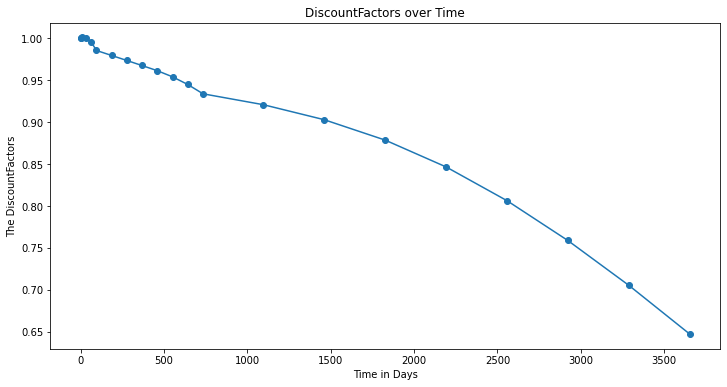

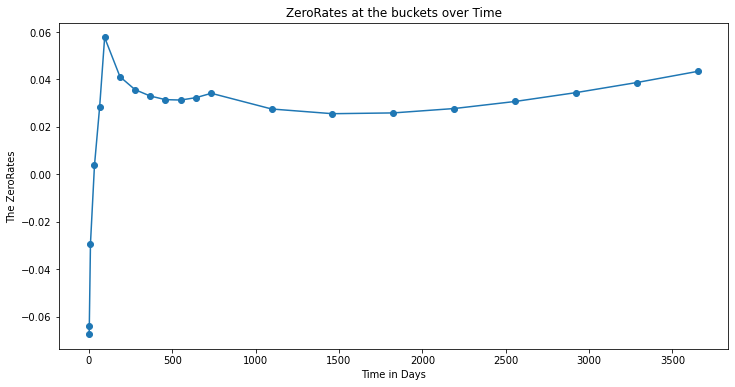

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(CurveDates, CurveDFs, marker='o')
plt.title("DiscountFactors over Time")
plt.xlabel("Time in Days")
plt.ylabel("The DiscountFactors")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(CurveDates, CurveZeros, marker='o')
plt.title("ZeroRates at the buckets over Time")
plt.xlabel("Time in Days")
plt.ylabel("The ZeroRates")
plt.show()

---
**Fwd_ofCurve** (CurveDates, CurveDFs, start, end, base) >> $ ( \frac {DF_{start}}{DF_{end}} -1 ) * \frac {base}{end - start}$


In [13]:
print( fiB.Fwd_ofCurve(CurveDates, CurveDFs, 10, 40, 360) )
print( fiB.Fwd_ofCurve(CurveDates, CurveDFs, 50, 80, 360) )
help  ( fiB.Fwd_ofCurve )

0.021399920549566076
0.08776459612015053
Help on function Fwd_ofCurve in module financeBas:

Fwd_ofCurve(CurveDates, CurveDFs, start, end, base)
    returns the Forward Cash Rate from the given curve
    :param CurveDates: list of the Dates in the Curve (Buckets)
    :param CurveDFs:   list of the DiscountFactor at each Date
    :param start: start date for Forward Rate
    :param end:  end   date for Forward Rate
    :param base: the DayCountBase of the Rate (e.g. 360 or 365)
    :return: the Forward Cash Rate



In [40]:
CurveDates[0:10]

[1, 2, 9, 33, 64, 94, 186, 276, 367, 459]

---
**show the Zero and Forwad Curve** over time

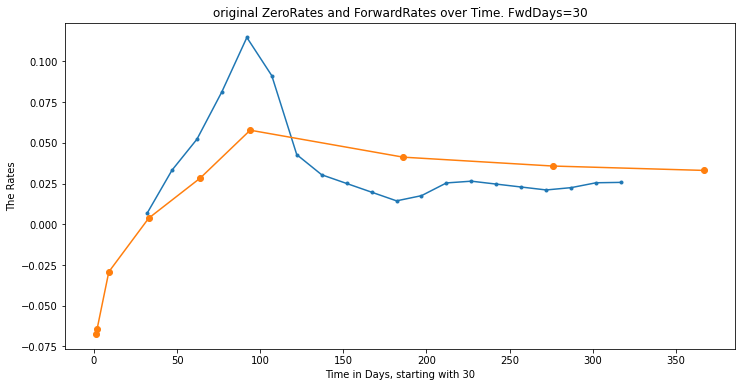

In [58]:
cDates = list()
cZeros = list()
cFwds  = list()

tenor = 30
for ii in range(0, 20): #130 = max
  start = 2 + (15*ii)
  end   = start + tenor
  zy    = fiB.ZeroRate_ofCurve(CurveDates, CurveDFs, end)
  fwd   = fiB.Fwd_ofCurve     (CurveDates, CurveDFs, start, end, 360)
  cDates.append(end)
  cZeros.append(zy)
  cFwds .append(fwd)

plt.figure(figsize=(12,6))
#plt.plot(cDates, cZeros, marker='.')
plt.plot(cDates, cFwds, marker='.')
plt.plot(CurveDates[0:9], CurveZeros[0:9], marker='o')
plt.title("original ZeroRates and ForwardRates over Time. FwdDays="+str(tenor))
plt.xlabel("Time in Days, starting with "+str(tenor))
plt.ylabel("The Rates")
plt.show()


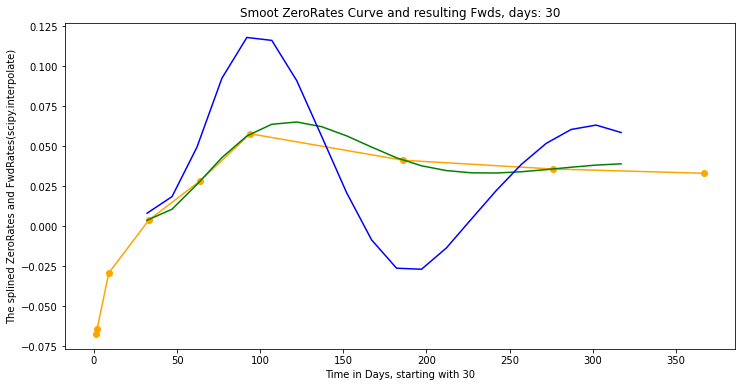

In [68]:
cDates = list()
cZeros = list()
cFwds  = list()

from scipy.interpolate import make_interp_spline
model=make_interp_spline(CurveDates[0:9], CurveZeros[0:9])
spl=model(cDates)

tenor = 30
for ii in range(0, 20): #130 = max
  start = 2 + (15*ii)
  end   = start + tenor
 #zy    = fiB.ZeroRate_ofCurve(CurveDates, CurveDFs, end)
  zy1   = model(start)
  df1   = fiB.DF_ofZerorate(zy1, start)
  zy2   = model(end)
  df2   = fiB.DF_ofZerorate(zy2, end)
 #fwd   = fiB.Fwd_ofCurve     (CurveDates, CurveDFs, start, end, 360)
  fwd   = (df1 / df2 -1) * (360/(end-start))
  cDates.append(end)
  cZeros.append(zy2)
  cFwds .append(fwd)

plt.figure(figsize=(12,6))
plt.plot(CurveDates[0:9], CurveZeros[0:9], marker='o', color='orange')
#plt.plot(cDates, spl, color='green')
plt.plot(cDates, cZeros, color='green')
plt.plot(cDates, cFwds,  color='blue')
plt.title("Smoot ZeroRates Curve and resulting Fwds, days: "+str(tenor))
plt.xlabel("Time in Days, starting with "+str(tenor))
plt.ylabel("The splined ZeroRates and FwdRates(scipy.interpolate)")
plt.show()


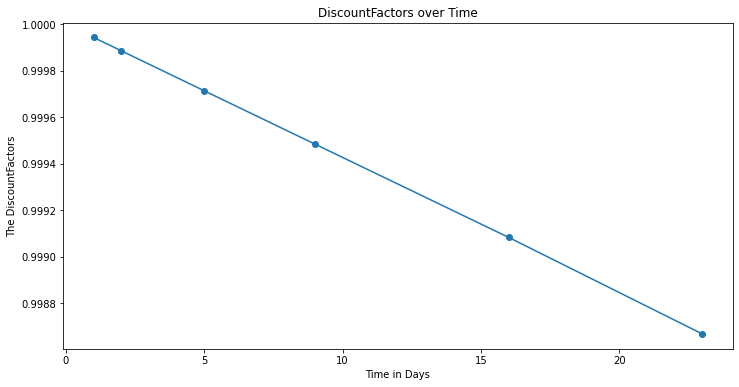

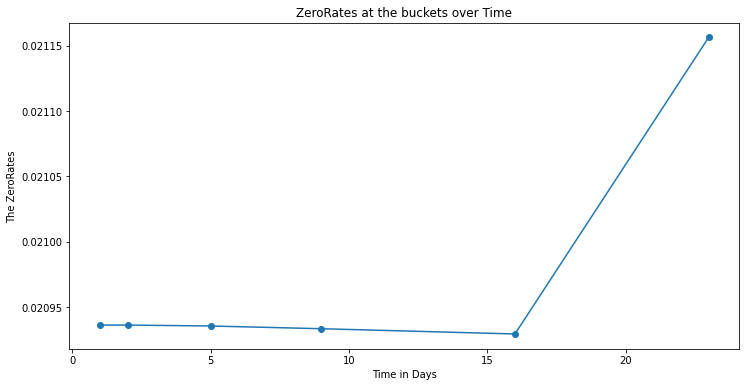

[1, 2, 5, 9, 16, 23]
[0.9999426421789971, 0.9998852876479138, 0.9997132536588467, 0.999483967071691, 0.9990829685195832, 0.9986677452218641]
[0.020936205099338297, 0.02093620509935252, 0.02093548463447813, 0.020933403719992364, 0.02092937856389344, 0.021156400076652867]


In [18]:
CrvDates = list()
CrvDFs   = list()
CrvZeros = list()

fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.02065,   1, 360,   0)   # O/N
fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.02065,   1, 360,   1)   # T/N
fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.02065,   3, 360,   2)   # S/N
fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.02065,   7, 360,   2)   # 1W
fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.02065,  14, 360,   2)   # 2W
fiB.addRateToCurve  (CrvDates, CrvDFs, CrvZeros,  0.0209,   21, 360,   2)   # 3W

plt.figure(figsize=(12,6))
plt.plot(CrvDates, CrvDFs, marker='o')
plt.title("DiscountFactors over Time")
plt.xlabel("Time in Days")
plt.ylabel("The DiscountFactors")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(CrvDates, CrvZeros, marker='o')
plt.title("ZeroRates at the buckets over Time")
plt.xlabel("Time in Days")
plt.ylabel("The ZeroRates")
plt.show()

print(CrvDates)
print(CrvDFs)
print(CrvZeros)

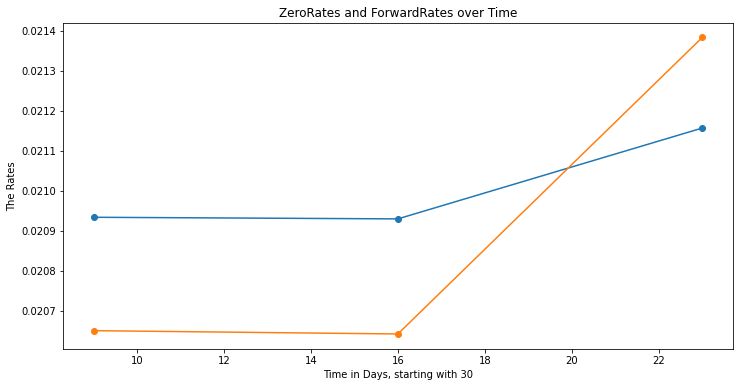

[9, 16, 23]
[0.020650000000001105, 0.02064171177934274, 0.021382828400866267]
[0.020933403719992364, 0.02092937856389344, 0.021156400076652867]


In [19]:
aDates = list()
aZeros = list()
aFwds  = list()

for ii in range(0, 3):
  start = 2 + (7*ii)
  end   = start + 7
  zy    = fiB.ZeroRate_ofCurve(CrvDates, CrvDFs, end)
  fwd   = fiB.Fwd_ofCurve     (CrvDates, CrvDFs, start, end, 360)
  aDates.append(end)
  aZeros.append(zy)
  aFwds .append(fwd)

plt.figure(figsize=(12,6))
plt.plot(aDates, aZeros, marker='o')
plt.plot(aDates, aFwds, marker='o')
plt.title("ZeroRates and ForwardRates over Time")
plt.xlabel("Time in Days, starting with 30")
plt.ylabel("The Rates")
plt.show()

print(aDates)
print(aFwds)
print(aZeros)